# Visualization reminders

## Bad map

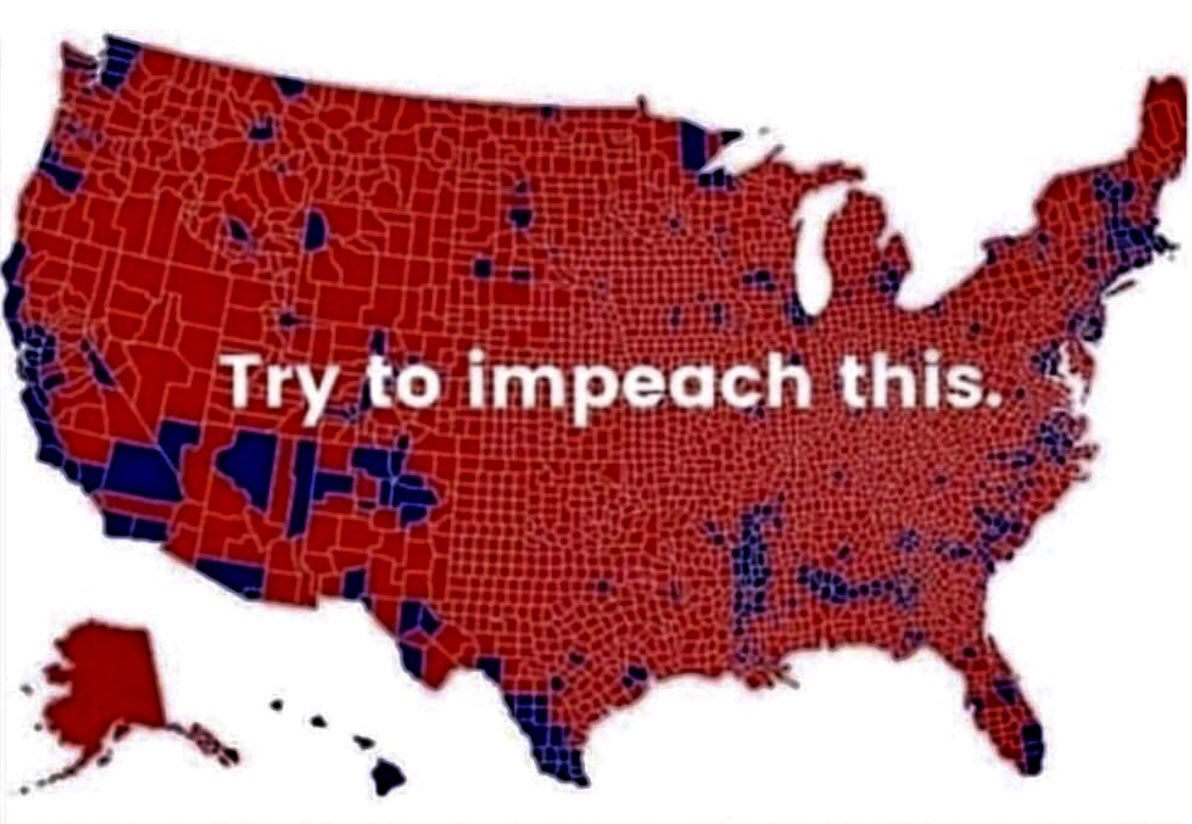

In [1]:
from IPython import display
display.Image('impeachthis.jpg')

## Bad scatter

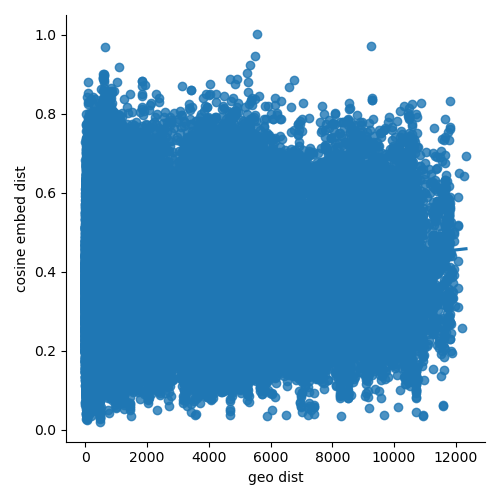

In [2]:
display.Image('simplevis-init.png')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_parquet(os.path.join('..', 'data', 'PG_passages_location_pairs_apr_17_2024.parquet'))
df.head()

,passage,city1,city2,city1 geocode,city2 geocode,city1 population,city2 population,geo dist,euclidean embed dist,cosine embed dist
0,"and persuaded a learned Calabrian , Leonzio Pi...",venice,florence,"45.43713, 12.33265","43.77925, 11.24626",51298,367150,126.393814,9.158424,0.181703
1,the world and to himself . During the decade f...,certaldo,florence,"43.54768, 11.03924","43.77925, 11.24626",12981,367150,19.058831,13.484865,0.388746
2,"You have heard , no doubt , of the appalling s...",moravia,poland,"42.71257, -76.4216","44.06063, -70.39367",1236,5314,317.356377,18.246614,0.657988
3,this was one of the desert parts of the Pacifi...,yokohama,honolulu,"35.43333, 139.65","21.30694, -157.85833",3761630,371657,3865.240650,11.759297,0.308633
4,it was . One evening late I was just coming ou...,san francisco,port said,"37.77493, -122.41942","31.26531, 32.3019",864816,780515,7409.835350,12.744214,0.423600


In [5]:
df.describe()

,city1 population,city2 population,geo dist,euclidean embed dist,cosine embed dist
count,1.099700e+05,1.099700e+05,109970.000000,109970.000000,109970.000000
mean,1.130291e+06,1.109619e+06,2595.509861,13.014261,0.373235
std,2.458399e+06,2.419705e+06,2807.755989,2.743466,0.143054
min,0.000000e+00,0.000000e+00,0.393346,2.835380,0.019230
25%,8.442000e+03,8.650000e+03,240.519716,11.063952,0.265764
50%,8.682500e+04,8.541600e+04,1212.923752,13.017459,0.362368
75%,7.155220e+05,7.155220e+05,4459.605572,14.933513,0.469044
max,2.231547e+07,2.231547e+07,12328.374984,23.100893,1.000898


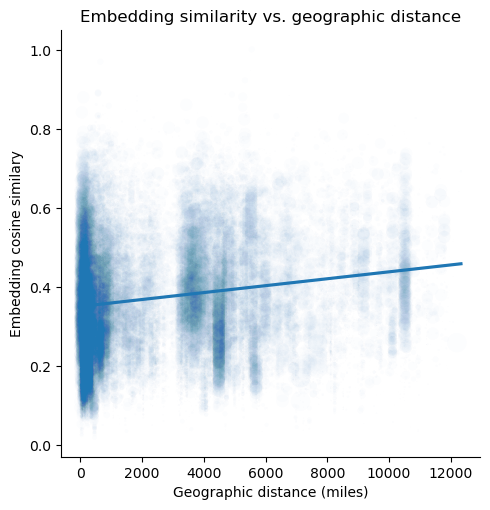

In [6]:
sns.lmplot(
    x='geo dist', 
    y='cosine embed dist', 
    data=df, 
    scatter_kws={
        'alpha':0.01,
        'edgecolors':'none',
        's':df['city1 population']/df['city1 population'].max()*200
    }
)
plt.xlabel('Geographic distance (miles)')
plt.ylabel('Embedding cosine similary')
plt.title('Embedding similarity vs. geographic distance')
plt.savefig('simplevis.png')